# Analysis Of Churn Of Telecom Company

### Import required python libraries for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

### Load Telecom Churn dataset into the Data frame

In [2]:
df = pd.read_csv("Telecom_Customer_Churn.csv")
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 

### Check for missing data

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Since 'TotalCharges' has Dtype 'Object', convert it to float64.                                                                                                               Copy dataframe for further Processing and modifications

In [6]:
telecom = df.copy()
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors = 'coerce')
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
telecom.loc[telecom.TotalCharges.isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
telecom.tenure[telecom["Churn"] == "Yes"].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [21]:
telecom.MonthlyCharges[telecom["Churn"] == "Yes"].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

### Delete rows with missing values

In [22]:
telecom.dropna(how = 'any', inplace = True)

In [23]:
telecom.TotalCharges[telecom["Churn"] == "Yes"].describe()

count    1863.000000
mean     1514.059045
std      1865.734181
min        18.850000
25%       133.275000
50%       692.100000
75%      2298.475000
max      8127.600000
Name: TotalCharges, dtype: float64

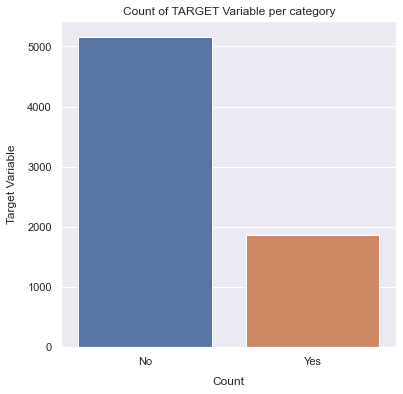

In [11]:
plt.figure(figsize = (6,6))
sns.countplot(x = telecom['Churn']).set_title("Count of TARGET Variable per category")
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.show()

### Get Summaries of Chuners using Boxplots and Violinplots

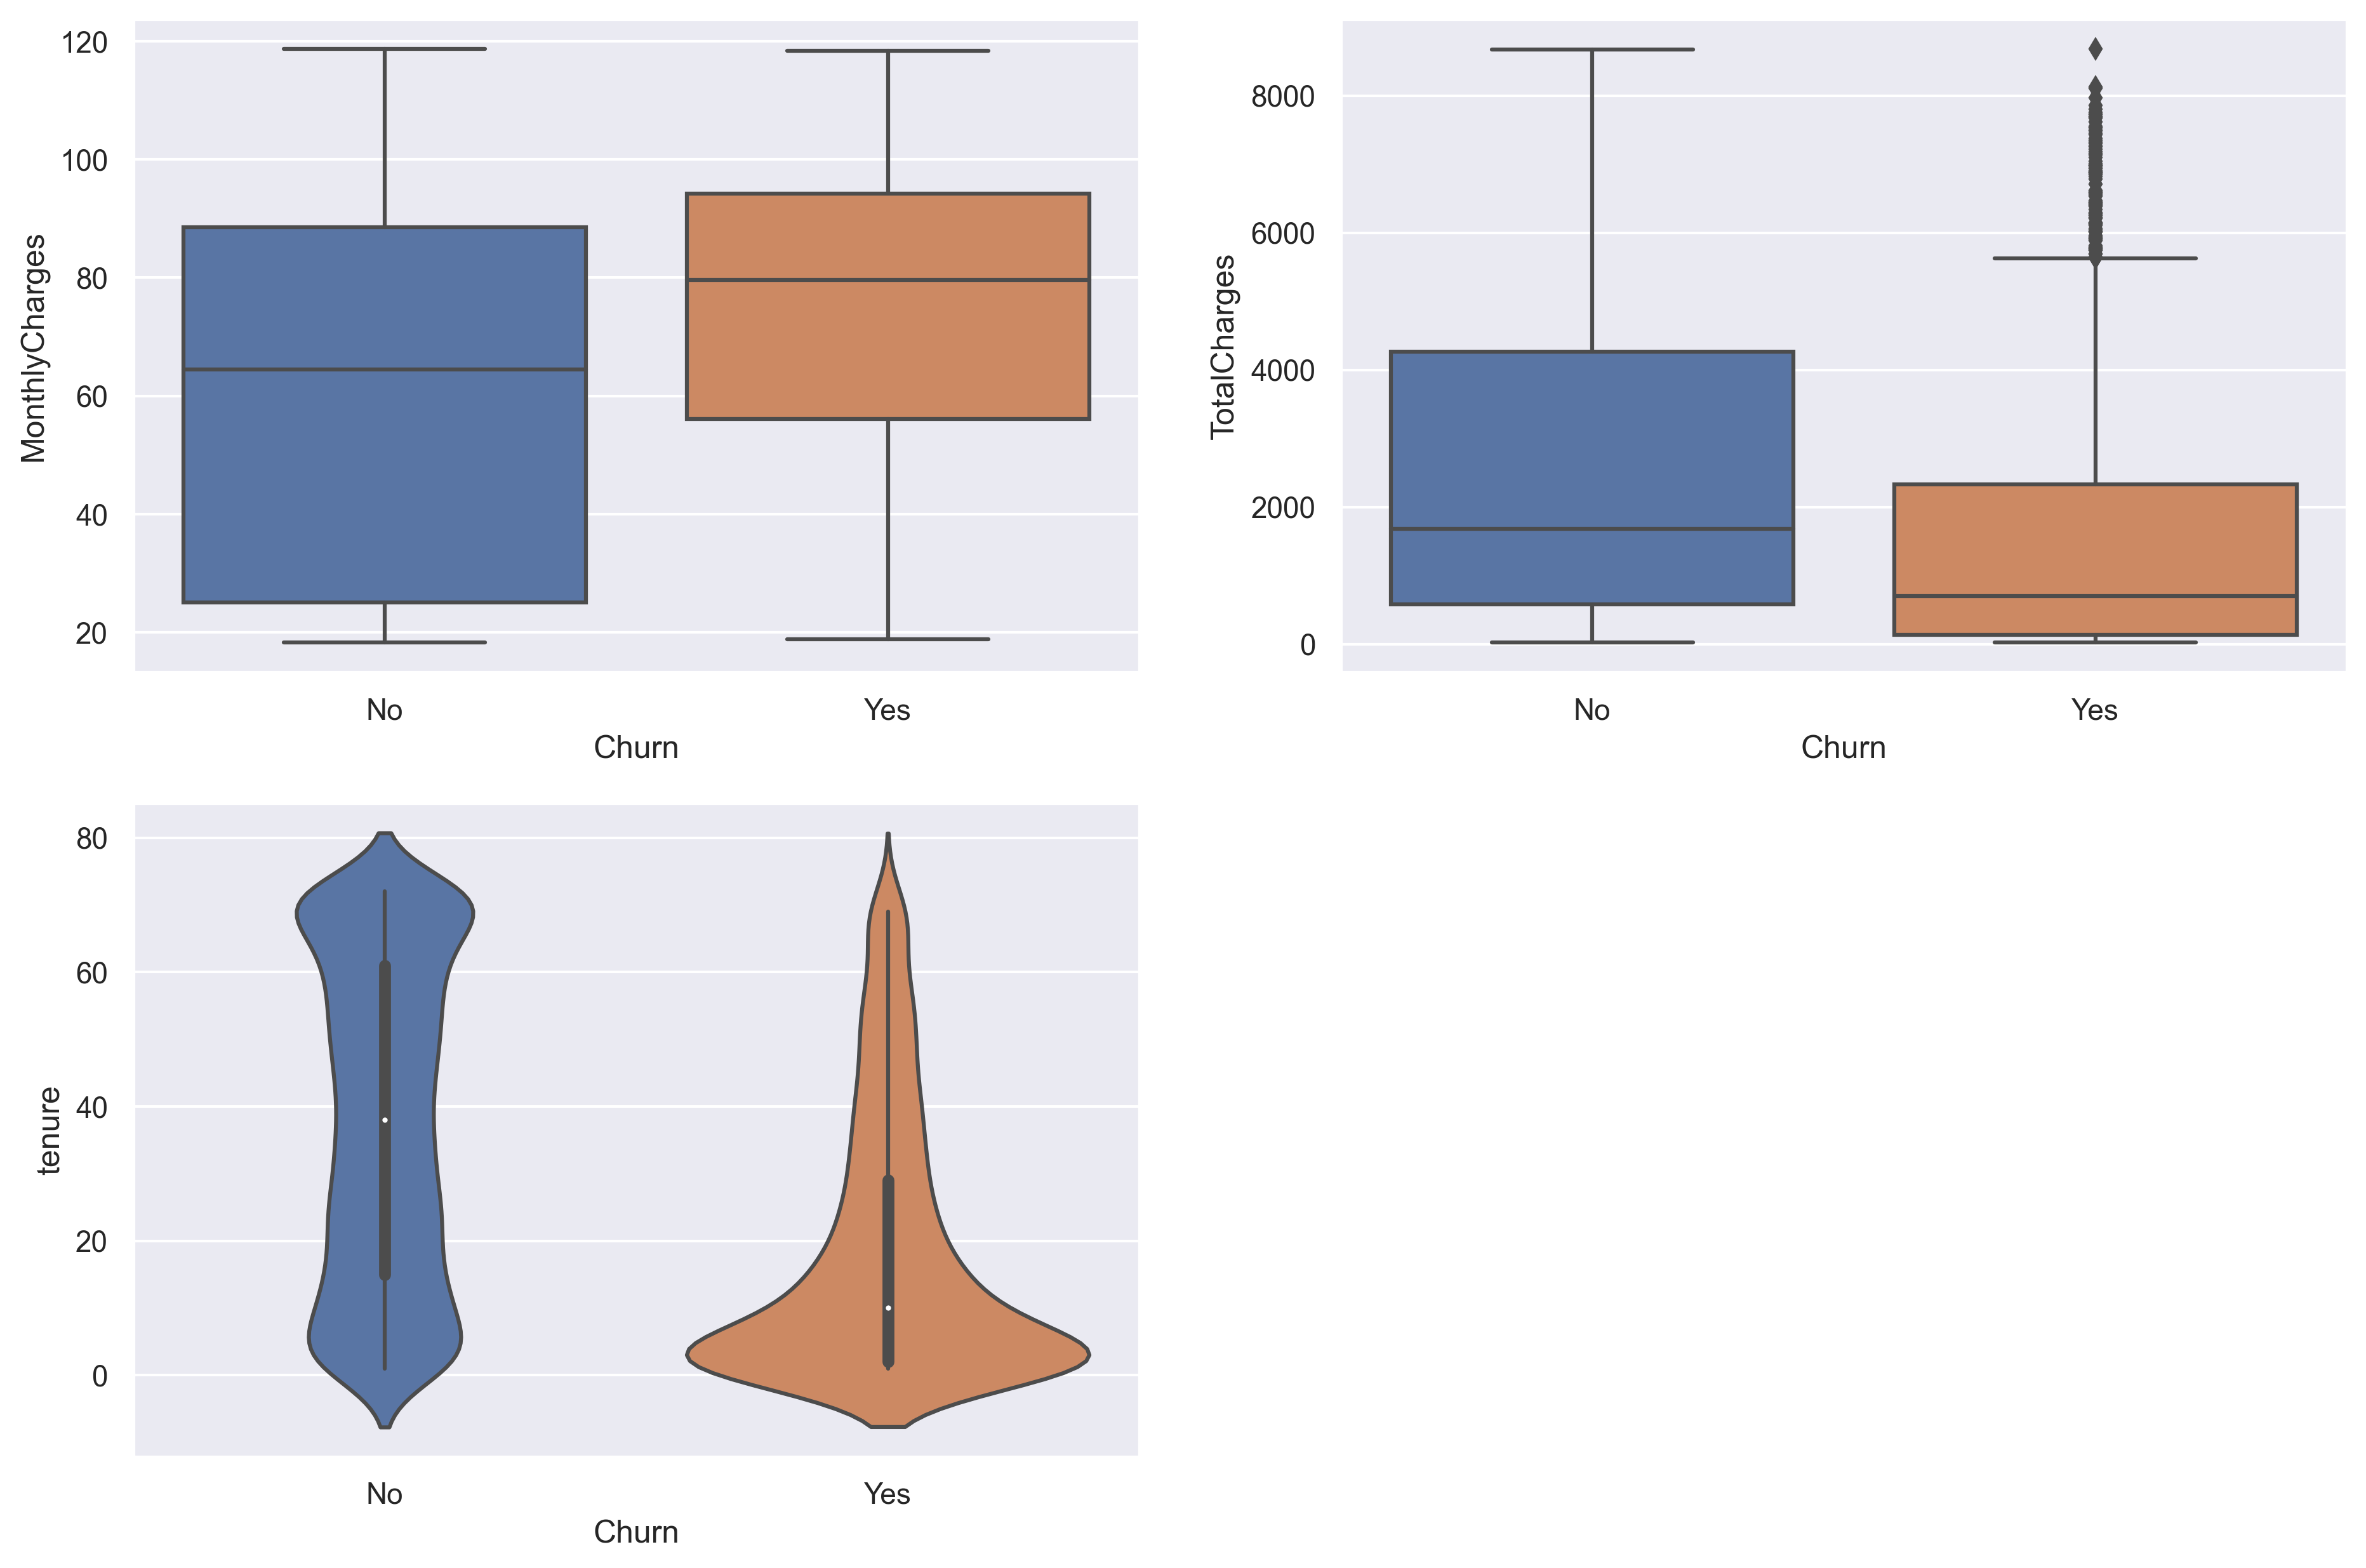

In [12]:
plt.figure(figsize=(15,10), dpi = 300)
plt.subplot(2,2,1)
sns.boxplot(y = "MonthlyCharges", x = "Churn", data = telecom)
plt.subplot(2,2,2)
sns.boxplot(y = "TotalCharges", x = "Churn", data = telecom)
plt.subplot(2,2,3)
sns.violinplot(y = "tenure", x = "Churn", data = telecom)
plt.show()

### Distribution of Churners

In [13]:
churn = telecom["Churn"].value_counts()
print(churn)
print()
print("Percentages of Churners")
print(churn*100/len(telecom["Churn"]))

No     5163
Yes    1869
Name: Churn, dtype: int64

Percentages of Churners
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


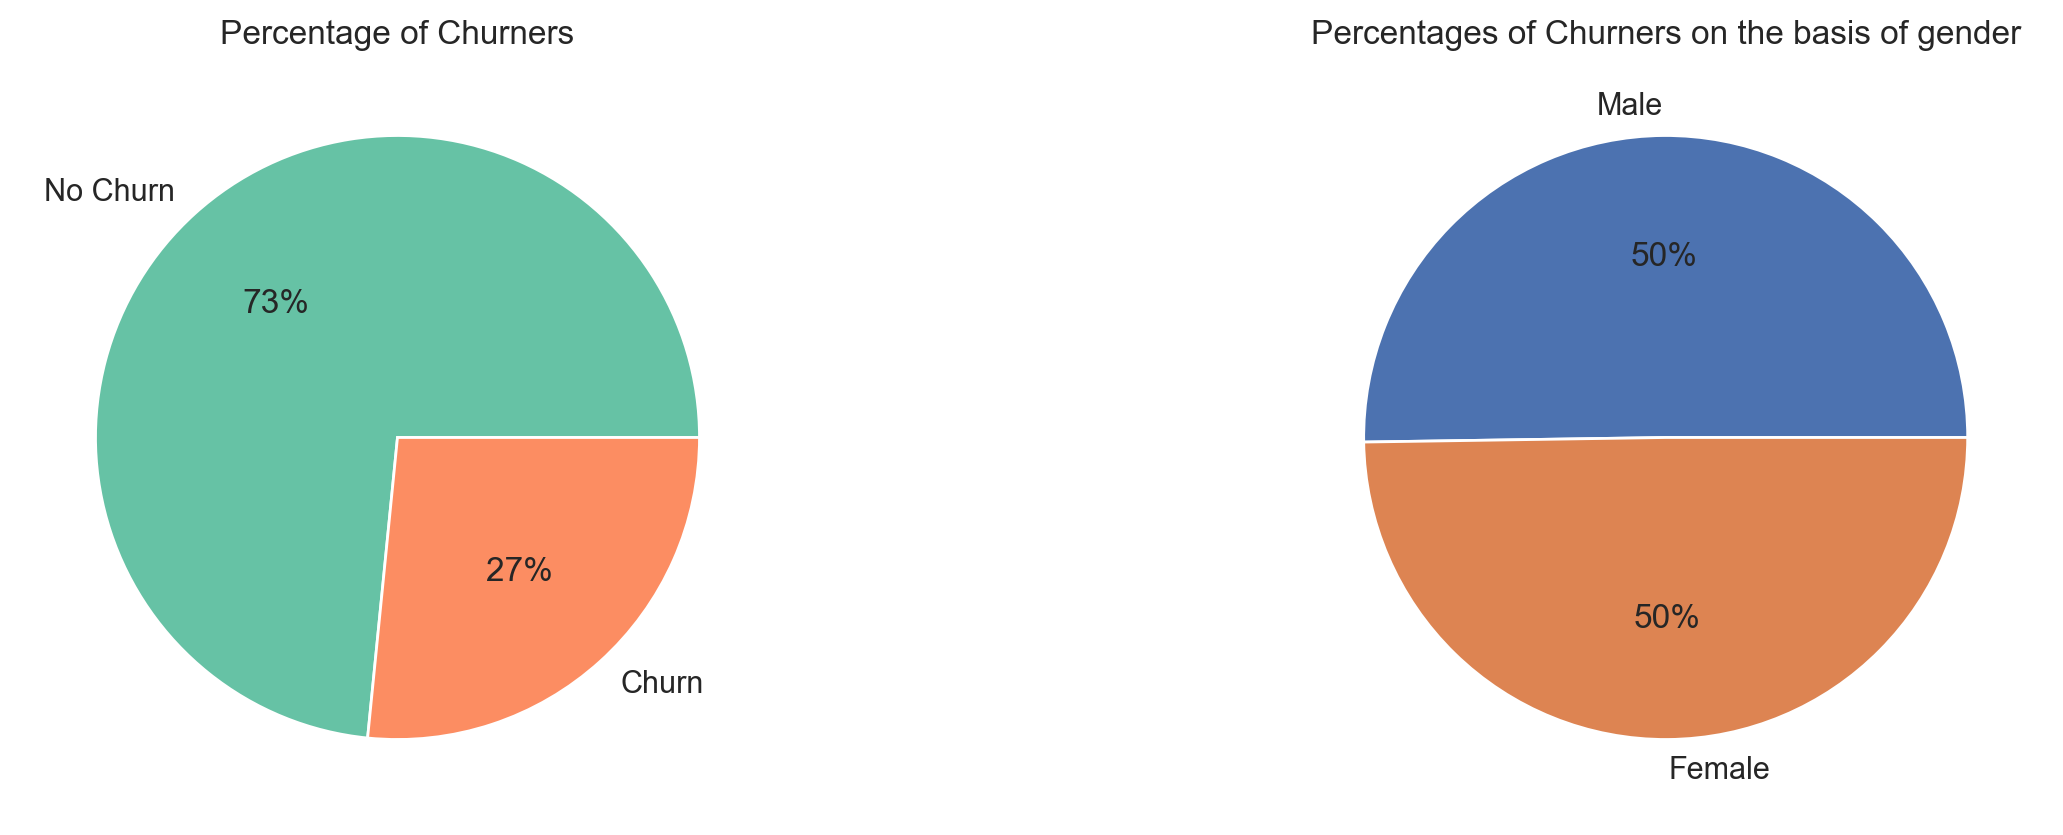

In [14]:
plt.figure(dpi = 200, figsize = (15,5))
plt.subplot(1,2,1)
col = sns.color_palette("Set2")
plt.pie(telecom["Churn"].value_counts(),colors = col, labels = ["No Churn","Churn"],autopct='%.0f%%')
plt.title("Percentage of Churners")

plt.subplot(1,2,2)
plt.pie(telecom.gender[telecom["Churn"] == "Yes"].value_counts(), labels = ["Male","Female"], autopct='%.0f%%')
plt.title("Percentages of Churners on the basis of gender")
plt.show()

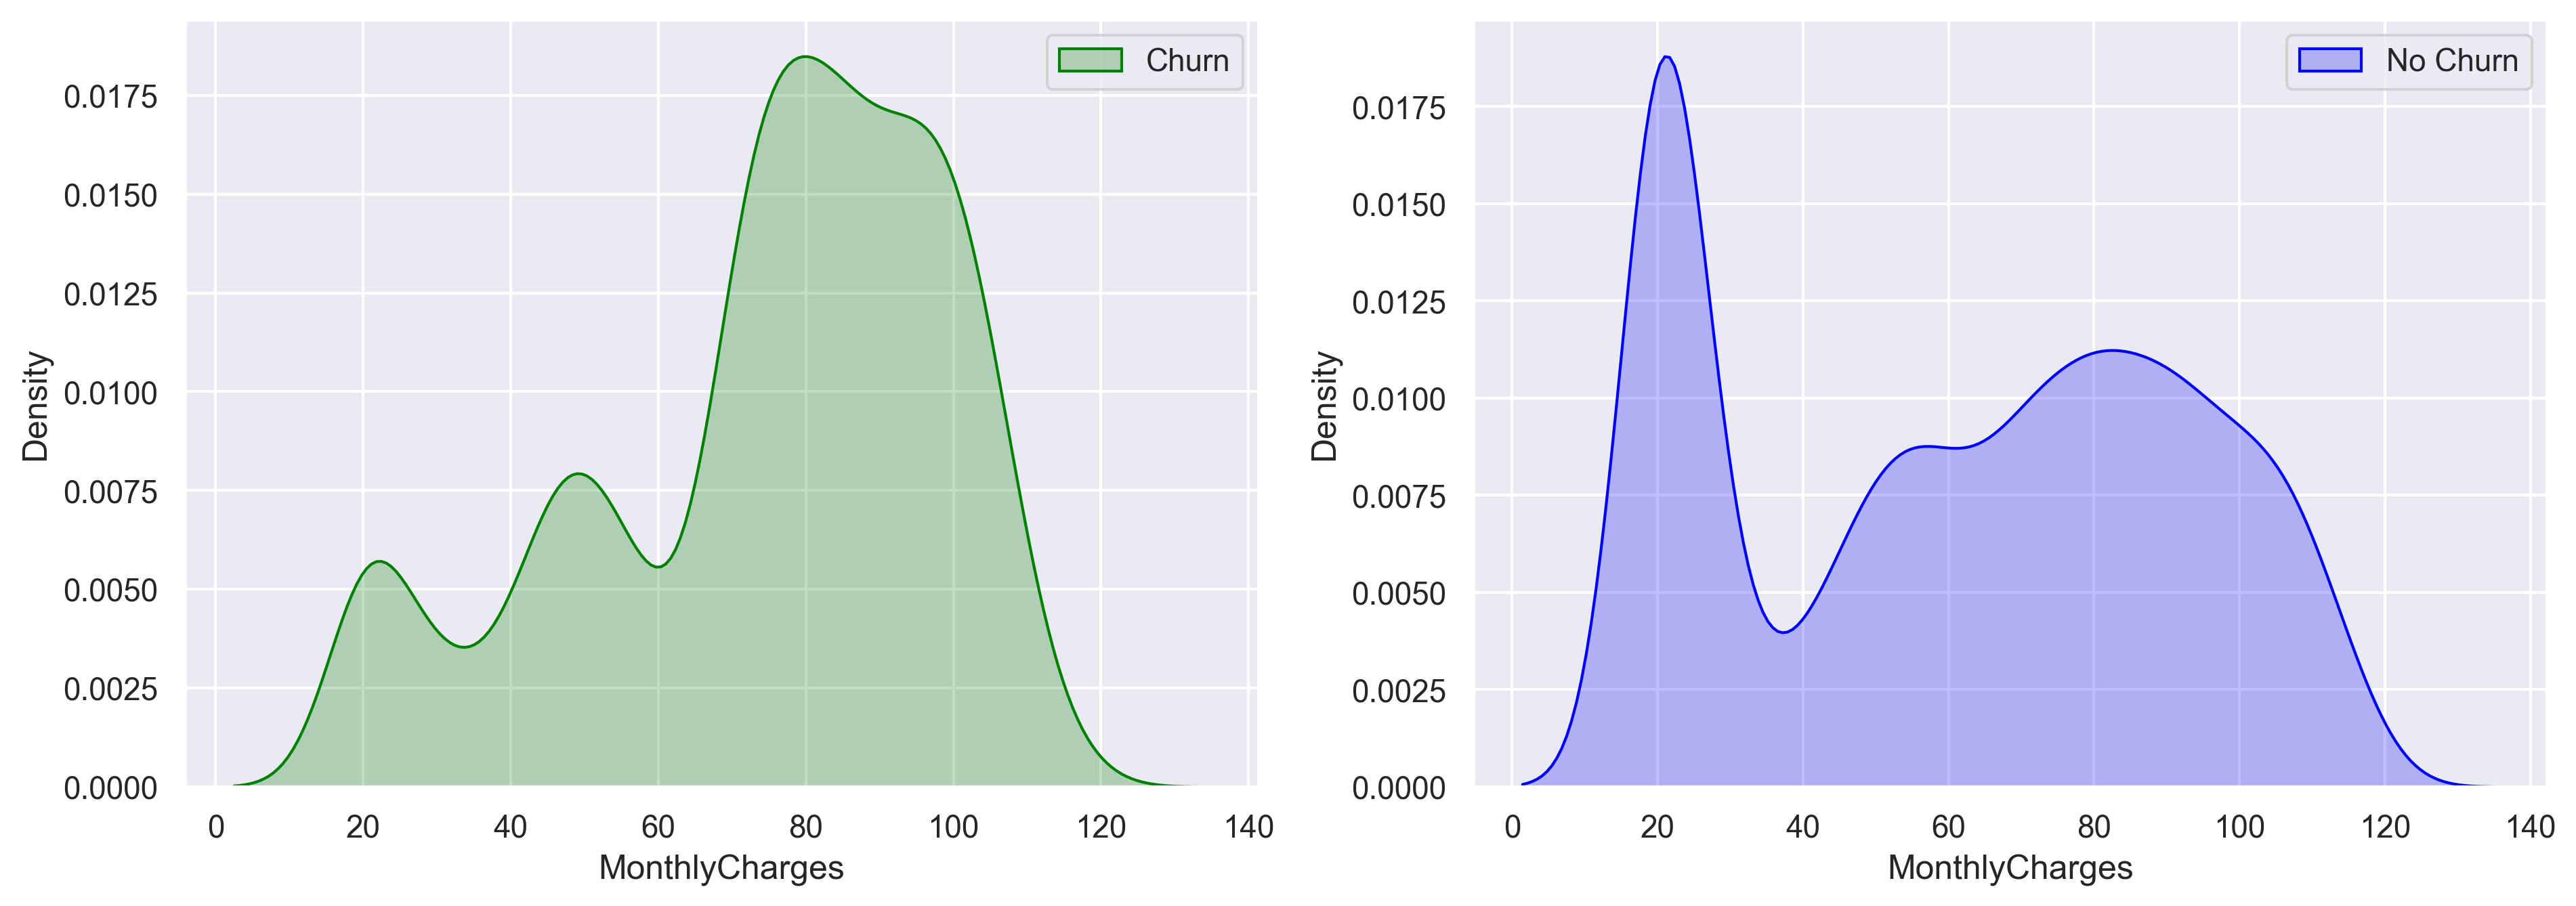

In [15]:
plt.figure(figsize = (15,5), dpi = 300)
plt.subplot(1,2,1)
sns.kdeplot(df.MonthlyCharges[df.Churn == "Yes"], shade = True, color = "Green")
plt.legend(["Churn"])

plt.subplot(1,2,2)
sns.kdeplot(df.MonthlyCharges[df.Churn == "No"], shade = True, color = "Blue")
plt.legend(["No Churn"])
plt.show()

## Churn distribution based on MonthlyCharges and TotalCharges

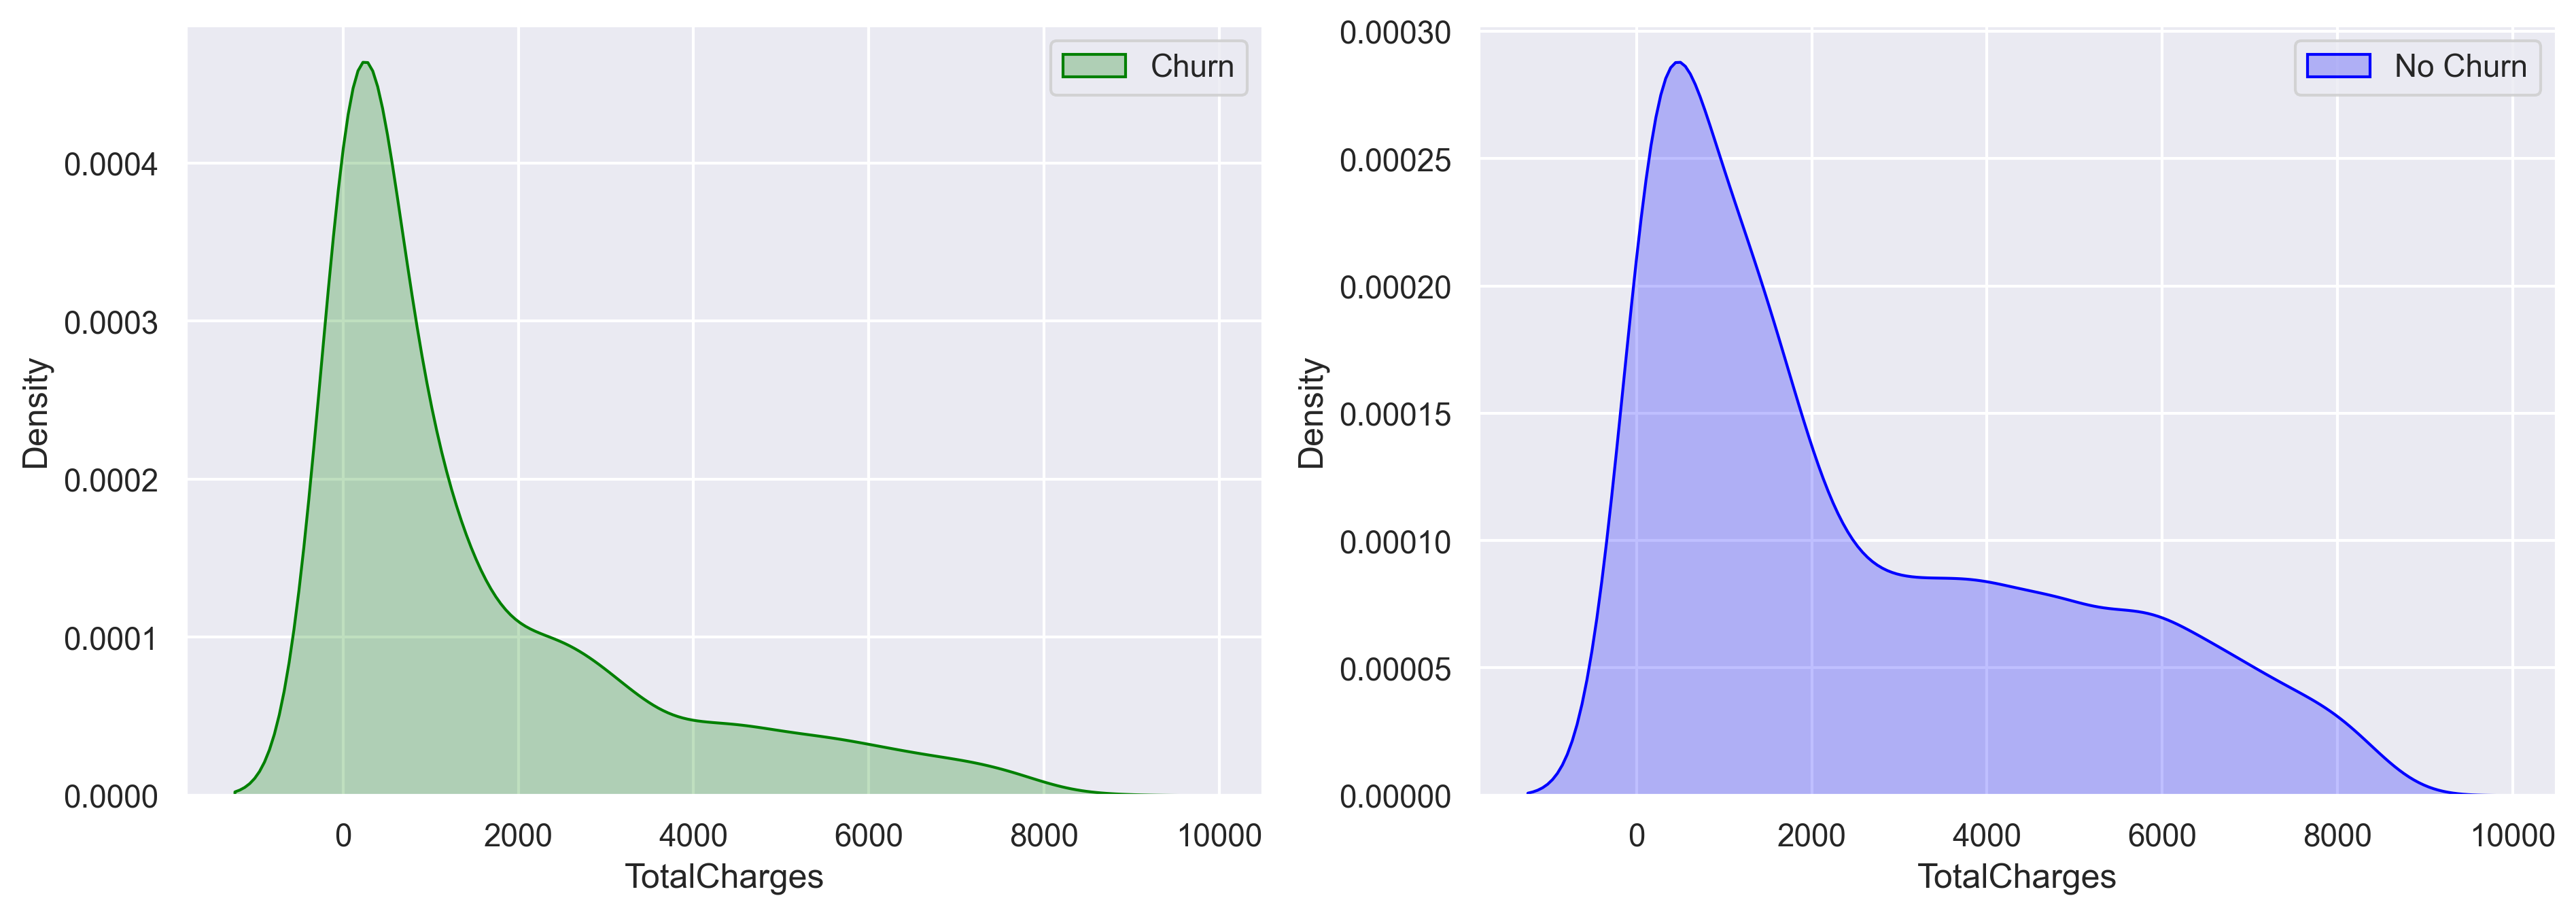

In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
plt.figure(figsize = (15,5), dpi = 300)
plt.subplot(1,2,1)
sns.kdeplot(df.TotalCharges[df.Churn == "Yes"], shade = True, color = "Green")
plt.legend(["Churn"])

plt.subplot(1,2,2)
sns.kdeplot(df.TotalCharges[df.Churn == "No"], shade = True, color = "Blue")
plt.legend(["No Churn"])
plt.show()

In [17]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Group data based on tenure groups

In [18]:
telecom['tenuregroup'] = pd.cut(telecom.tenure, range(0, 80, 12), right=False)
tele_dum = telecom.copy()
rem = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','tenuregroup']

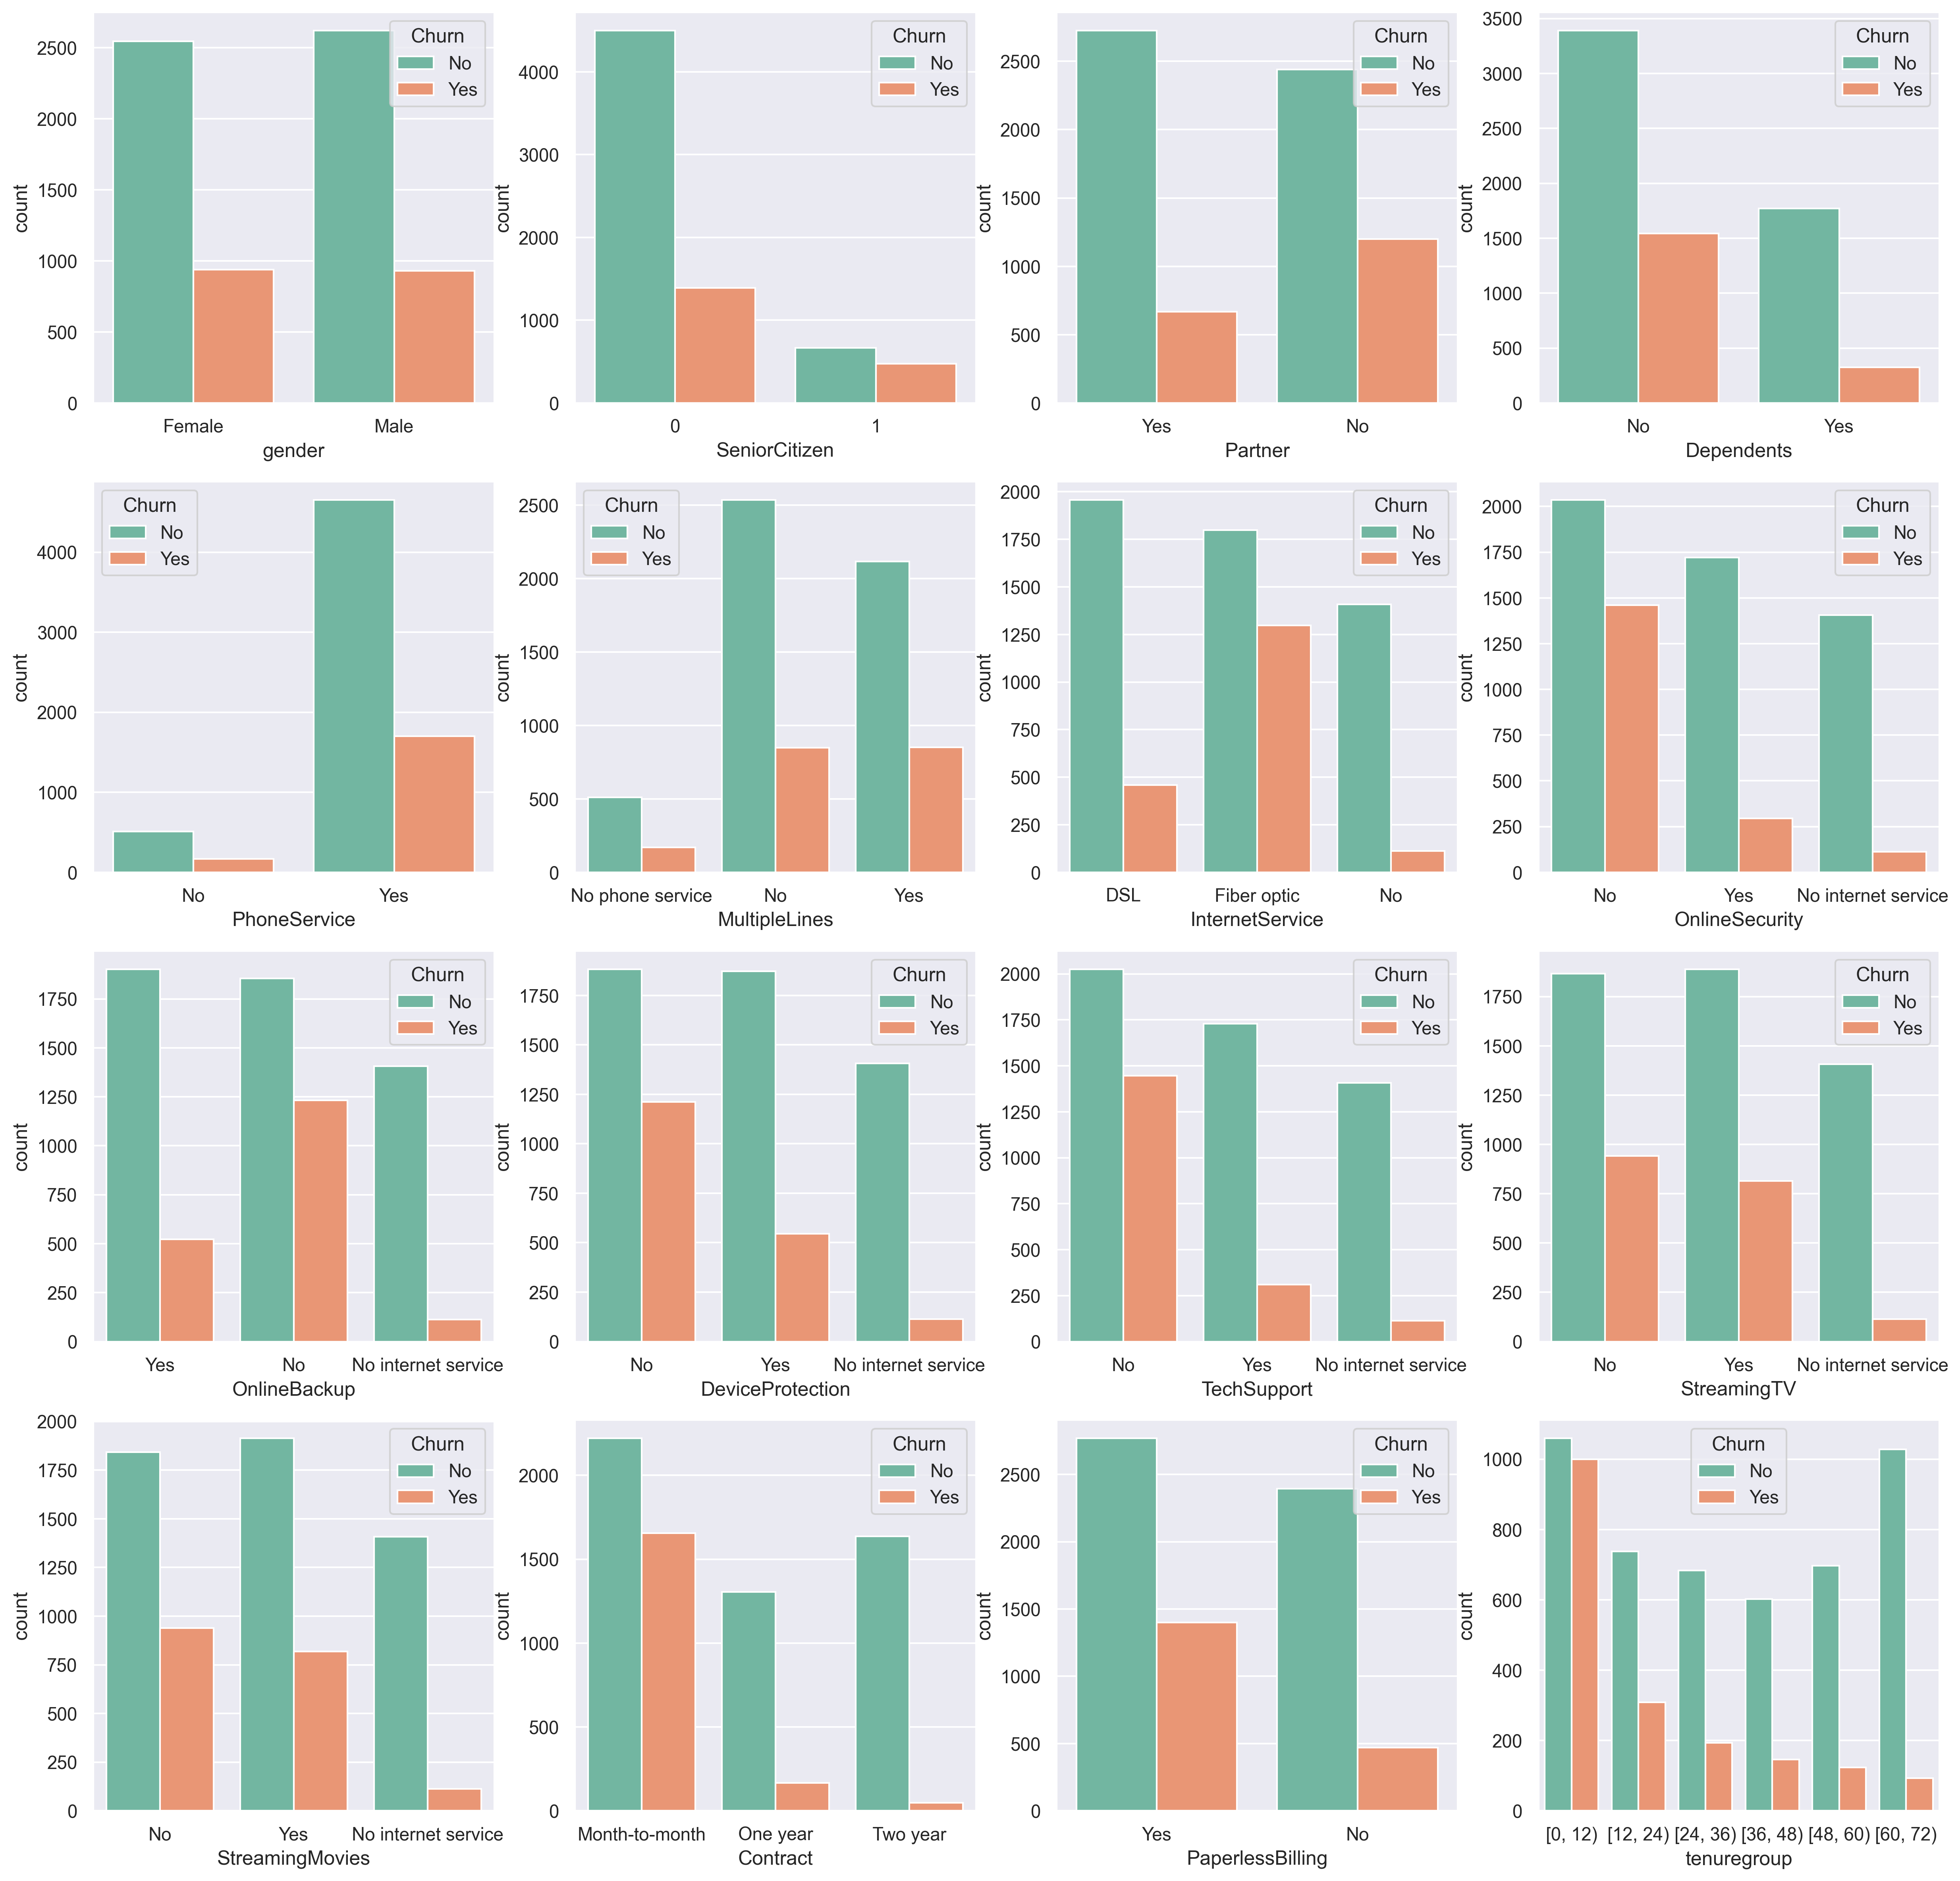

In [19]:
i = 1
plt.figure(figsize = (20,20), dpi = 300)
for k in rem:
    if i>16:
        break
    plt.subplot(4,4,i)
    sns.countplot(data = telecom, x = k, hue = "Churn", palette = "Set2")
    i+=1
plt.show()

### Observe variations of churner for different attributes